In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

# Gradient Descent

Imagine a blindfolded person sitting at the bottom of a hill (or anywhere on the hill really). Their goal is to get to the top of the hill. How would they do it?

![Blind Hill Climber](http://www.ryanleeallred.com/wp-content/uploads/2019/01/gradient-ascent.png)

* detect the slope of the hill that they're standing on 
* take a step in an upwards direction
* repeat until slope feels flat

**Gradient Descent** is an algorithm that is used for finding the optimal values of a function (maximum or minimum). Although we described our hiker man as if he was trying to find a maximum value, Gradient Descent is typically used to find minimum values of a function. Let's learn a little more about how Gradient Descent uses an iterative mathematic approach (like our hiker) to find a function's minimum.

# "Hypothesis" Functions

In Linear Regression we estimate parameters $\beta_0, \beta_1, \ldots , \beta_n$. and plug them into our model. This version of our model with real coefficient values is a Hypothesis Function. However, it is not a requirement of hypothesis functions that they use the estimated parameters. They could contain any real values for the betas and still be a hypothesis function. Lets look at some examples. We'll go back to our ice cream sales example for some easy data to demonstrate with. 

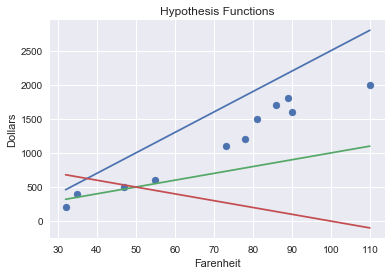

In [2]:
# Read Data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/Ice_Cream_Sales.csv')

# Creat Scatterplot
plt.scatter(df.Farenheit, df.Dollars)

X = df[['Farenheit']].values
y = df[['Dollars']].values

# Create Hypothesis Function Lines
plt.plot(X, [ 30*x -  500 for x in X])
plt.plot(X, [ 10*x +    0 for x in X])
plt.plot(X, [-10*x + 1000 for x in X])

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Hypothesis Functions")

# Plot Hypothesis Functions
plt.show()

The above are all Hypothesis functions, they don't necessarily fit our data the best, but they are created using the same model, they just have different (arbitrary) parameters for $\beta_0$ and $\beta_1$. We'll represent hypothesis functions generally as $h(x)$.

The above hypotheis functions all follow the form:

\begin{align}
  h(x) = \theta_0 + \theta_1X
\end{align}

Basically we're assuming that the function that best fits the data is linear (a line) and hypothesizing the $\theta$ values that define that line.

## Given the hypothesis functions below, which is closest to the optimum?

How do you know? How do you measure the quality of a hypothesis?

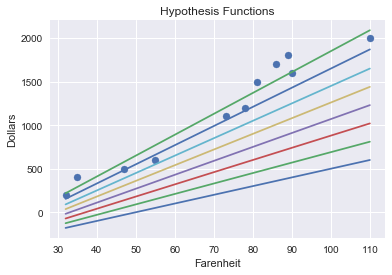

In [3]:
X = df[['Farenheit']].values
y = df[['Dollars']].values

# Creat Scatterplot
plt.scatter(X, y)

# Create Hypothesis Function Lines
h1 = [10*x - 500 for x in X]
h2 = [12*x - 510 for x in X]
h3 = [14*x - 520 for x in X]
h4 = [16*x - 530 for x in X]
h5 = [18*x - 540 for x in X]
h6 = [20*x - 550 for x in X]
h7 = [22*x - 550 for x in X]
h8 = [24*x - 550 for x in X]

plt.plot(X, h1)
plt.plot(X, h2)
plt.plot(X, h3)
plt.plot(X, h4)
plt.plot(X, h5)
plt.plot(X, h6)
plt.plot(X, h7)
plt.plot(X, h8)

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Hypothesis Functions")

# Plot Hypothesis Functions
plt.show()

How can you show that one of these lines (and by extension its $\theta$ parameters) is closer to the optimal $\beta$ values? 

# Cost Functions

Functions that gradient descent is trying to minimize are usually referred to as "cost functions" these functions are also referred to by names like: loss function, error function, or scoring function. 

We can measure the quality of our hypotheses using a **cost function**. A cost function compares our hypothesis line to our actual y values and gives it a score based on how well our hypothesis function fits the data. How might we define a cost function to give a score to how well our hypotheses fit the data? We would find the sum of the squared error (or residuals) between our fitted values and our datapoints:

\begin{align}
SSE = \sum_{i=1}^{n}(y_i - \hat{y})^2
\end{align}

We might rewrite our SSE equation in terms of our hypothesis functions instead of our already optimized function like so:

\begin{align}
SSE = \sum_{i=1}^{n}(y_i - h(x_i))^2
\end{align}

The goal is to find the values for $\theta_0$ and $\theta_1$ (contained within $h(x)$) that minimize this cost function ("minimize the sum of the squared residuals").

## What does this cost function look like?



Text(0, 0.5, 'SSE')

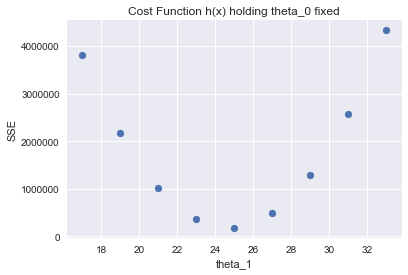

In [4]:
# Define a function that can calculate SSE for any hypothesis function
def h_x(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def SSE(theta_0, theta_1, y, X, h_func=h_x):
    squared_residuals = []
    for x_i, y_i in zip(X, y):
        h_y = h_func(theta_0, theta_1, x_i)
        squared_residuals.append((h_y - y_i) ** 2)
        
    return sum(squared_residuals)

# Investigate various slopes
theta_0 = -600
theta_1s = list(range(17, 35, 2))
SSEs = []
for theta_1 in theta_1s:
    SSE_i = SSE(theta_0, theta_1, y, X)
    SSEs.append(SSE_i)
    
plt.scatter(theta_1s, SSEs)
plt.title("Cost Function h(x) holding theta_0 fixed")
plt.xlabel('theta_1')
plt.ylabel('SSE')

This parabolic shape is due to varying only the slope (theta_1) while holding the intercept constant. If we varied both values we would then have a mapping of a higher dimension. What would our cost function look like if we varied both $\theta_0$ and $\theta_1$? Something like this:

![Cost Function](https://1569708099.rsc.cdn77.org/wp-content/uploads/2017/09/Quadratic-Cost-Function-379x284.png?x31195)

Where the x axis is $\theta_0$ the z axis is $\theta_1$ and the y axis is our $SSE(\theta_0, \theta_1)$

# Using Gradient Descent to Minimize Cost Functions

One use of gradient descent is to minimize cost functions. To our blindfolded hiker, that might look something like this:

![X^2 Gradient Descent](https://jed-ai.github.io//images/python/py1/fig2.gif)

If we took our 3D plot and turned it into a contour plot his travels might look something like this:

![3D Gradient Descent](https://jed-ai.github.io//images/python/py1/fig4.gif)

We'll first talk about using Gradient Descent to minimize an arbitrary cost function and then later we'll implement it specifically on our linear regression example. 

First lets talk about the equation for gradient descent:

![Gradient Descent Equation](https://cdn-images-1.medium.com/max/800/0*8yzvd7QZLn5T1XWg.jpg)

- $J$ represents our cost function.
- **gradient** is the derivative term in front of $J$ (the fraction part). In 2D space this is the "slope".
- $\alpha$ is our "Learning Rate" (how big of steps that we we initially take)
- $\theta_j$ represents our current position. So all of the RHS (right hand side) of this equation is calculated all at once and is then used to replace our current position with the new updated position.


1. Start off with initial guesses for $\theta_0$ and $\theta_1$. (typically between 0 and 1)
2. Change $\theta_0$ and $\theta_1$ a little bit (according to the above equation) and reevaluate our cost function.

Notice that our step size (alpha) is multiplied by our gradient (slope) such that we take smaller and smaller steps as the graph gets flatter (closer to a minimum hopefully).

# Optimizing The Learning Rate

This is part of a process that we call hyperparameter tuning. Hyperparameter tuning in its most crude form basically means try out different features of your parameters (like learning rate) and see what happens to your results. Keep on iterating until you converge on an optimal learning rate. (Maybe we can implement gradient descent to find the most optimal learning rate for our gradient descent. 🤔)

You can read up on different techniques for choosing an appropriate learning rate. We will explore more sophisticated Hyperparameter Tuning techniques later on in the class.

You'll usually be fine with a pretty small learning rate (.01 or .02) when you're solving linear regression using Gradient Descent (as long as you use a sufficient number of iterations)

![Learning Rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

# Gradient Descent Implementation for Bivariate Linear Regression

**X matrix must be standardized**

### Compare to sklearn

In [5]:
# Read Data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/Ice_Cream_Sales.csv')

# Create X matrix and y vector
X = df[['Farenheit']].values

# z-standardize - if we don't do this our GD stuff will break
X = (X - X.mean()) / X.std()

# Matrix version makes cool linalg tricks possible
X_linalg = np.c_[np.ones(X.shape[0]), X] 

print(X_linalg)

# Boring y variable list
y = df['Dollars'].values

# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print("beta_1: ", beta_1)
print("beta_0: ", beta_0)

[[ 1.         -1.61957156]
 [ 1.         -1.49352   ]
 [ 1.         -0.98931376]
 [ 1.         -0.65317627]
 [ 1.          0.10313309]
 [ 1.          0.31321903]
 [ 1.          0.43927059]
 [ 1.          0.64935652]
 [ 1.          0.77540808]
 [ 1.          0.81742527]
 [ 1.          1.65776901]]
beta_1:  587.5808413073934
beta_0:  1145.4545454545455


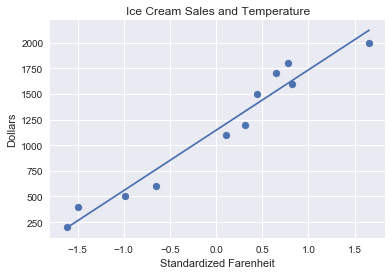

In [6]:
# Plot the points
plt.scatter(X, y)

# Plot the line of best fit
y_hat = [beta_1*x + beta_0 for x in X]
plt.plot(X,y_hat)

# Add labels and title
plt.ylabel("Dollars")
plt.xlabel("Standardized Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show()

### Minimal Gradient-Descent Implementation

In [7]:
# Hyperparameters
alpha = 0.02 # Step Size
iterations = 2000 # Number of iterations
theta = [0, 0]

# Other Important Variables
n = y.size
np.random.seed(42)

def gradient_descent(x, y, theta, iterations, alpha):
    for i in range(iterations):
        prediction = np.dot(X_linalg, theta)
        error = prediction - y
        theta = theta - (alpha * (1/n)*np.dot(X_linalg.T, error))
    return theta

final_theta = gradient_descent(X_linalg, y, theta, iterations, alpha)
print('theta_0:', final_theta[0], 'theta_1:', final_theta[1], sep='\n')

theta_0:
1145.45454545454
theta_1:
587.5808413073904


theta_0:
1145.45454545454
theta_1:
587.5808413073904


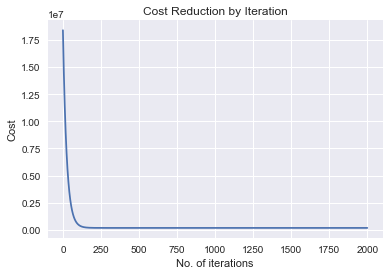

In [8]:
# Implementation with saved cost and theta values for graphing costs and animations
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    for i in range(iterations):
        prediction = np.dot(X_linalg, theta)
        error = prediction - y
        theta = theta - (alpha * (1/n)*np.dot(X_linalg.T, error))
        cost = np.dot(error.T, error)
        past_costs.append(cost)
    return theta, past_costs

final_theta, past_costs = gradient_descent(X_linalg, y, theta, iterations, alpha)
print('theta_0:', final_theta[0], 'theta_1:', final_theta[1], sep='\n')

plt.plot(past_costs)
plt.title('Cost Reduction by Iteration')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

## Gradient Descent *is* Machine Learning

What does Gradient Descent do? It finds model parameters that minimize a cost function. (That get the best results!) This cuts to the very heart of what machine learning is: solving uniquely specified optimization problems. I hope you can see how this iterative process of seeing an optimum is not just good for machines, but can be an elegant way of describing learning in general. For both humans and computers!

## Improvements to Gradient Descent

There are **many** Gradient-Descent based optimizers out there that seek improve upon the "vanilla" gradient descent that we have implemented here.

What if we had a cost function that wasn't convex? What if our cost function had multiple local minima?

![Global Minimum](http://www.ryanleeallred.com/wp-content/uploads/2019/01/Global-Minimum.png)

But what if we had initialized our theta values just slightly differently. Where would the gradient have taken us? 

![Local Minimum](http://www.ryanleeallred.com/wp-content/uploads/2019/01/Local-Minima.png)

Hopefully these two images help you see how with more complex cost functions it can be difficult to find the global minimum and even slightly different initial values can lead to completely different results. The question about how to overcome these challenges has lead to a plethora of gradient-descent based optimizers all seeking to overcome these challenges.

If you feel like you have a good grasp of what I'm calling "vanilla" gradient descent then start delving into understanding these different optimizers:

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)